# **<h1 align="center">Projet `Finite Mixtures & Co-clustering`</h1>**

<h2 align="center">🤖 Maroua GHAOUAT 🤖</h2>
<h3 align="center"><code>AMSD</code></h3>

    
## Objectif du Projet
BBC News est un ensemble de données composé d'articles de presse. Pour ce projet, nous explorerons deux formats de données différents : 1) une matrice de document-terme, et 2) des embeddings de documents générés à l'aide du modèle JOSE. Le fichier bbc_dataset.mat comprend ces deux formats ainsi que les labels, qui serviront à évaluer les performances des algorithmes de clustering utilisés.
## Composantes du Projet

Les sections que nous aborderons dans ce projet sont :

* K-Means simple
* Spherical K-Means  
* L'algorithme EM

---

# Installation des librairies et chargement des données

In [ ]:
!pip install requests
!pip install umap-learn
!pip install mpl_toolkits

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=7c7d802fc2f02eb1c895e7734e42d5565a4cef6fb281bdc21effa92b88211e22
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [ ]:
import requests, pickle, zipfile, io, subprocess
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from umap import UMAP
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Installation du package CAEClust
url = "https://cifre.s3.eu-north-1.amazonaws.com/CAEclust_package.zip"
response = requests.get(url)
with open("CAEclust.zip", "wb") as fichier_zip:
 fichier_zip.write(response.content)
with zipfile.ZipFile("CAEclust.zip", "r") as zip_ref:
 zip_ref.extractall("CAEclust_package")

In [ ]:
# Télécharger les données BBC et NG20
bbc_url = "https://cifre.s3.eu-north-1.amazonaws.com/bbc_dataset.pickle"
ng20_url = "https://cifre.s3.eu-north-1.amazonaws.com/ng20_dataset.pickle"
bbc_filepath, ng20_filepath = "bbc_dataset.pickle", "ng20_dataset.pickle"
response = requests.get(bbc_url)
with open(bbc_filepath, 'wb') as bbc_file:
 bbc_file.write(response.content)
response = requests.get(ng20_url)
with open(ng20_filepath, 'wb') as ng20_file:
 ng20_file.write(response.content)
with open(bbc_filepath, 'rb') as bbc_file:
 bbc_data = pickle.load(bbc_file)
with open(ng20_filepath, 'rb') as ng20_file:
 ng20_data = pickle.load(ng20_file)

In [ ]:
# Charger les données
ng20_jose, bbc_jose = ng20_data["jose"], bbc_data["jose"]
ng20_tfidf, bbc_tfidf = ng20_data["tfidf"], bbc_data["tfidf"]
ng20_labels, bbc_labels = ng20_data["labels"], bbc_data["labels"]

---
# 1. Dimension des datasets :

In [ ]:
# Pour BBC News
#TF-IDF
num_documents_bbc, dimension_bbc = bbc_tfidf.shape
print(f"TF-IDF BBC News Dimensions - Numéro de documents : {num_documents_bbc}, Dimension : {dimension_bbc}")

#JoSE
num_documents_jose_bbc, dimension_jose_bbc = bbc_jose.shape
print(f"JoSE BBC News Dimensions - Number of documents: {num_documents_jose_bbc}, Dimension: {dimension_jose_bbc}")
print("\n")

# Pour NG20
#TF-IDF
num_documents_ng20, dimension_ng20 = ng20_tfidf.shape
print(f"TF-IDF NG20 Dimensions - Numéro de documents : {num_documents_ng20}, Dimension : {dimension_ng20}")

#JoSE
num_documents_jose_ng20, dimension_jose_ng20 = ng20_jose.shape
print(f"JoSE NG20 Dimensions - Number of documents: {num_documents_jose_ng20}, Dimension: {dimension_jose_ng20}")



TF-IDF BBC News Dimensions - Numéro de documents : 2225, Dimension : 2000
JoSE BBC News Dimensions - Number of documents: 2225, Dimension: 100


TF-IDF NG20 Dimensions - Numéro de documents : 18791, Dimension : 2000
JoSE NG20 Dimensions - Number of documents: 18791, Dimension: 100


# 2. Appliquer l’ACP et UMAP sur les jeux de données en retenant 15 composantes.
## 2.1. ACP :
### 2.1.1. Sur BCC News :

In [ ]:
# TF-IDF
pca_tfidf_bbc = PCA(n_components=15)
bbc_tfidf_pca = pca_tfidf_bbc.fit_transform(bbc_tfidf)
print("Forme de TF-IDF après PCA :", bbc_tfidf_pca.shape)

# JoSE
pca_jose_bbc = PCA(n_components=15)
bbc_jose_pca = pca_jose_bbc.fit_transform(bbc_jose)
print("Forme de JoSE après PCA :", bbc_jose_pca.shape)


Forme de TF-IDF après PCA : (2225, 15)
Forme de JoSE après PCA : (2225, 15)


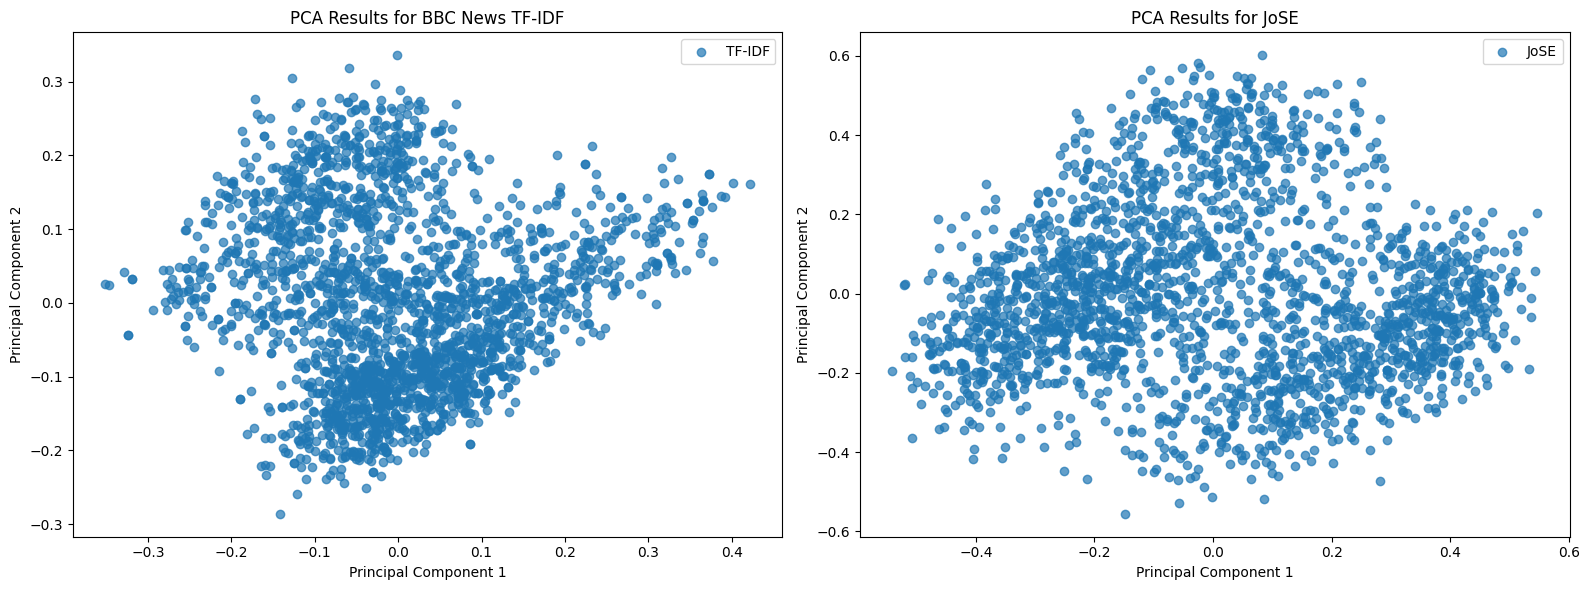

In [ ]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot PCA results for BBC News TF-IDF
axes[0].scatter(bbc_tfidf_pca[:, 0], bbc_tfidf_pca[:, 1], label='TF-IDF', alpha=0.7)
axes[0].set_title('PCA Results for BBC News TF-IDF')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()

# Plot PCA results for JoSE
axes[1].scatter(bbc_jose_pca[:, 0], bbc_jose_pca[:, 1], label='JoSE', alpha=0.7)
axes[1].set_title('PCA Results for JoSE')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


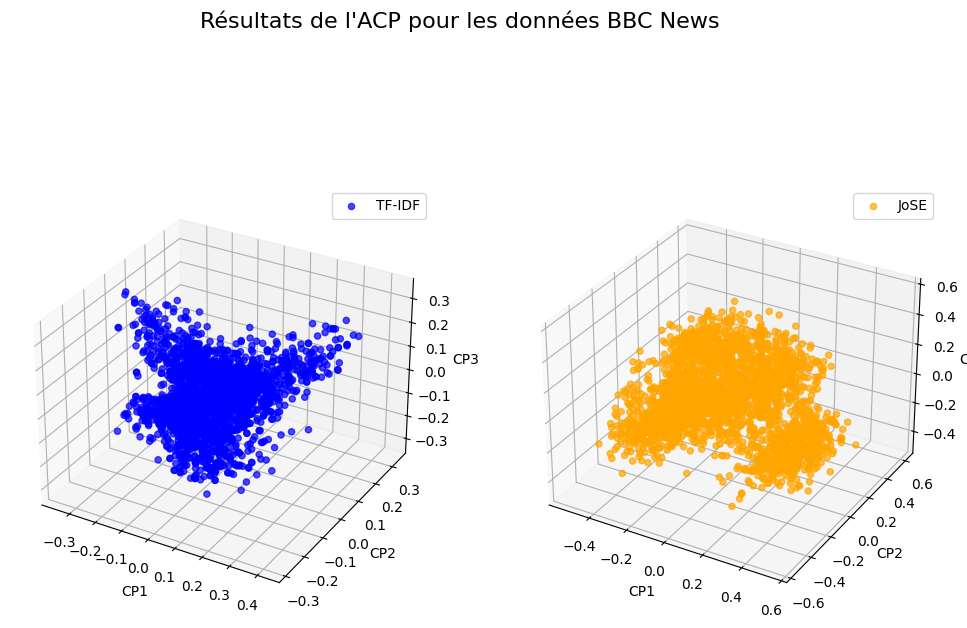

In [ ]:
# Create a 3D subplot for TF-IDF
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(bbc_tfidf_pca[:, 0], bbc_tfidf_pca[:, 1], bbc_tfidf_pca[:, 2], alpha=0.7, c='blue', label='TF-IDF')

ax1.set_xlabel('CP1')
ax1.set_ylabel('CP2')
ax1.set_zlabel('CP3')
ax1.legend()

# Create a 3D subplot for JoSE
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(bbc_jose_pca[:, 0], bbc_jose_pca[:, 1], bbc_jose_pca[:, 2], alpha=0.7, c='orange', label='JoSE')

ax2.set_xlabel('CP1')
ax2.set_ylabel('CP2')
ax2.set_zlabel('CP3')
ax2.legend()

# Overall title for the entire plot
fig.suptitle('Résultats de l\'ACP pour les données BBC News', fontsize=16)
plt.show()


### 2.1.2. Sur NG20 :

In [ ]:
# TF-IDF NG20
pca_tfidf_ng20 = PCA(n_components=15)
ng20_tfidf_pca = pca_tfidf_ng20.fit_transform(ng20_tfidf)
print("Forme de TF-IDF NG20 après PCA :", ng20_tfidf_pca.shape)

# JoSE NG20
pca_jose_ng20 = PCA(n_components=15)
ng20_jose_pca = pca_jose_ng20.fit_transform(ng20_jose)
print("Forme de JoSE NG20 après PCA :", ng20_jose_pca.shape)

Forme de TF-IDF NG20 après PCA : (18791, 15)
Forme de JoSE NG20 après PCA : (18791, 15)


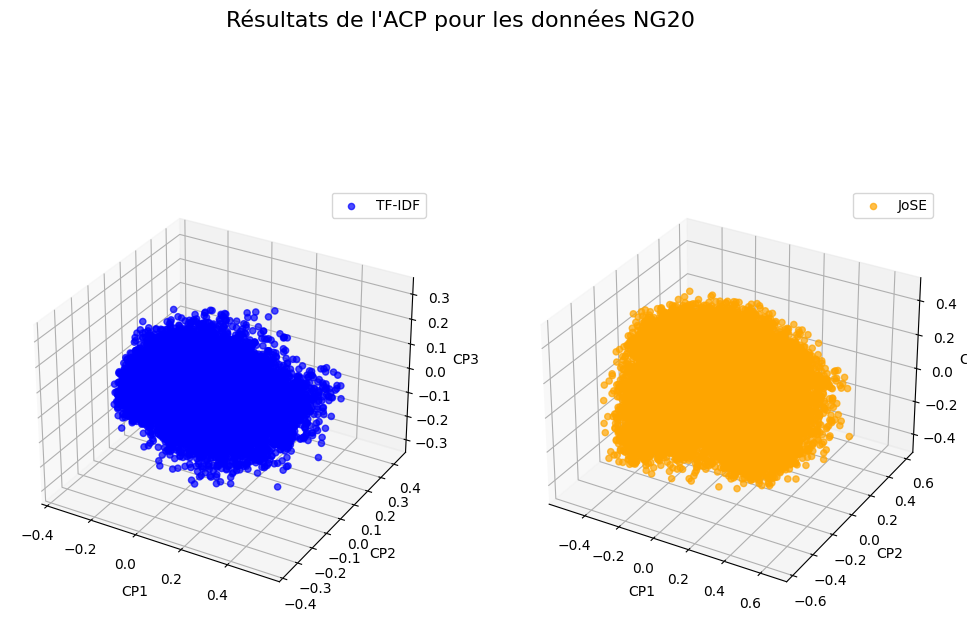

In [ ]:

# Create a 3D subplot for TF-IDF
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(ng20_tfidf_pca[:, 0], ng20_tfidf_pca[:, 1], ng20_tfidf_pca[:, 2], alpha=0.7, c='blue', label='TF-IDF')

ax1.set_xlabel('CP1')
ax1.set_ylabel('CP2')
ax1.set_zlabel('CP3')
ax1.legend()

# Create a 3D subplot for JoSE
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(ng20_jose_pca[:, 0], ng20_jose_pca[:, 1], ng20_jose_pca[:, 2], alpha=0.7, c='orange', label='JoSE')

ax2.set_xlabel('CP1')
ax2.set_ylabel('CP2')
ax2.set_zlabel('CP3')
ax2.legend()

# Overall title for the entire plot
fig.suptitle('Résultats de l\'ACP pour les données NG20', fontsize=16)
plt.show()


## 2.2. UMAP :
### 2.2.1. Sur BCC News :

In [ ]:
# TF-IDF BBC
umap_tfidf_bbc = UMAP(n_components=15)
bbc_tfidf_umap = umap_tfidf_bbc.fit_transform(bbc_tfidf)
print("Forme de TF-IDF BBC après UMAP :", bbc_tfidf_umap.shape)

# JoSE BBC
umap_jose_bbc = UMAP(n_components=15)
bbc_jose_umap = umap_jose_bbc.fit_transform(bbc_jose)
print("Forme de JoSE BBC après UMAP :", bbc_jose_umap.shape)

Forme de TF-IDF BBC après UMAP : (2225, 15)
Forme de JoSE BBC après UMAP : (2225, 15)


### 2.2.2. Sur NG20 :

In [ ]:
# TF-IDF NG20 après UMAP
umap_ng20 = UMAP(n_components=15)
ng20_tfidf_umap = umap_ng20.fit_transform(ng20_tfidf)
print("Forme de TF-IDF NG20 après UMAP :", ng20_tfidf_umap.shape)

# JoSE NG20 après UMAP
umap_jose_ng20 = UMAP(n_components=15)
ng20_jose_umap = umap_jose_ng20.fit_transform(ng20_jose)
print("Forme de JoSE NG20 après UMAP :", ng20_jose_umap.shape)

Forme de TF-IDF NG20 après UMAP : (18791, 15)
Forme de JoSE NG20 après UMAP : (18791, 15)


# 3. K-means sur les données réduites avec le vrai nombre de classes
## 3.1. Sur BBC News :
### 3.1.1. Sur les données réduites avec  ACP :

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from sklearn import metrics
#TF-IDF
kmeans_tfidf_bbc = KMeans(n_clusters=5, random_state=42)
bbc_tfidf_clusters = kmeans_tfidf_bbc.fit_predict(bbc_tfidf_pca)

# Calcul de NMI et ARI pour TF-IDF
nmi_tfidf_pca = metrics.normalized_mutual_info_score(bbc_labels, bbc_tfidf_clusters)
ari_tfidf_pca = metrics.adjusted_rand_score(bbc_labels, bbc_tfidf_clusters)
print("Résultats pour TF-IDF (KMeans sur données réduites avec ACP) :")
print(f"NMI : {nmi_tfidf_pca:.4f}")
print(f"ARI : {ari_tfidf_pca:.4f}")

#JoSE
kmeans_jose_bbc = KMeans(n_clusters=5, random_state=42)
bbc_jose_clusters = kmeans_jose_bbc.fit_predict(bbc_jose_pca)

# Calcul de NMI et ARI pour JoSE
nmi_jose_pca = metrics.normalized_mutual_info_score(bbc_labels, bbc_jose_clusters)
ari_jose_pca = metrics.adjusted_rand_score(bbc_labels, bbc_jose_clusters)
print("\nRésultats pour JoSE (KMeans sur données réduites avec ACP) :")
print(f"NMI : {nmi_jose_pca:.4f}")
print(f"ARI : {ari_jose_pca:.4f}")

Résultats pour TF-IDF (KMeans sur données réduites avec ACP) :
NMI : 0.7750
ARI : 0.8024

Résultats pour JoSE (KMeans sur données réduites avec ACP) :
NMI : 0.8418
ARI : 0.8806


### 3.1.2. Sur les données réduites avec UMAP :

In [ ]:
# TF-IDF avec UMAP
kmeans_tfidf_bbc_umap = KMeans(n_clusters=5, random_state=42)
bbc_tfidf_clusters_umap = kmeans_tfidf_bbc_umap.fit_predict(bbc_tfidf_umap)

# Calcul de NMI et ARI pour TF-IDF avec UMAP
nmi_tfidf_umap = metrics.normalized_mutual_info_score(bbc_labels, bbc_tfidf_clusters_umap)
ari_tfidf_umap = metrics.adjusted_rand_score(bbc_labels, bbc_tfidf_clusters_umap)
print("Résultats pour TF-IDF (KMeans sur données réduites avec UMAP) :")
print(f"NMI : {nmi_tfidf_umap:.4f}")
print(f"ARI : {ari_tfidf_umap:.4f}")

# JoSE avec UMAP
kmeans_jose_bbc_umap = KMeans(n_clusters=5, random_state=42)
bbc_jose_clusters_umap = kmeans_jose_bbc_umap.fit_predict(bbc_jose_umap)

# Calcul de NMI et ARI pour JoSE avec UMAP
nmi_jose_umap = metrics.normalized_mutual_info_score(bbc_labels, bbc_jose_clusters_umap)
ari_jose_umap = metrics.adjusted_rand_score(bbc_labels, bbc_jose_clusters_umap)
print("\nRésultats pour JoSE (KMeans sur données réduites avec UMAP) :")
print(f"NMI : {nmi_jose_umap:.4f}")
print(f"ARI : {ari_jose_umap:.4f}")


Résultats pour TF-IDF (KMeans sur données réduites avec UMAP) :
NMI : 0.6211
ARI : 0.6027

Résultats pour JoSE (KMeans sur données réduites avec UMAP) :
NMI : 0.8614
ARI : 0.8942


## 3.2. Sur NG20 :

### 3.2.1. Sur les données réduites avec ACP :

In [ ]:
# TF-IDF NG20
kmeans_tfidf_ng20 = KMeans(n_clusters=20, random_state=42)
ng20_tfidf_clusters = kmeans_tfidf_ng20.fit_predict(ng20_tfidf_pca)

# Calcul de NMI et ARI pour TF-IDF NG20
nmi_tfidf_ng20_pca = metrics.normalized_mutual_info_score(ng20_labels, ng20_tfidf_clusters)
ari_tfidf_ng20_pca = metrics.adjusted_rand_score(ng20_labels, ng20_tfidf_clusters)
print("Résultats pour TF-IDF (KMeans sur données réduites avec ACP) :")
print(f"NMI : {nmi_tfidf_ng20_pca:.4f}")
print(f"ARI : {ari_tfidf_ng20_pca:.4f}")

# JoSE NG20
kmeans_jose_ng20 = KMeans(n_clusters=20, random_state=42)
ng20_jose_clusters = kmeans_jose_ng20.fit_predict(ng20_jose_pca)

# Calcul de NMI et ARI pour JoSE NG20
nmi_jose_ng20_pca = metrics.normalized_mutual_info_score(ng20_labels, ng20_jose_clusters)
ari_jose_ng20_pca = metrics.adjusted_rand_score(ng20_labels, ng20_jose_clusters)
print("\nRésultats pour JoSE (KMeans sur données réduites avec ACP) :")
print(f"NMI : {nmi_jose_ng20_pca:.4f}")
print(f"ARI : {ari_jose_ng20_pca:.4f}")


Résultats pour TF-IDF (KMeans sur données réduites avec ACP) :
NMI : 0.2366
ARI : 0.0973

Résultats pour JoSE (KMeans sur données réduites avec ACP) :
NMI : 0.4837
ARI : 0.2917


### 3.2.2. Sur les données réduites avec UMAP :

In [ ]:
# TF-IDF avec UMAP
kmeans_tfidf_ng20_umap = KMeans(n_clusters=20, random_state=42)
ng20_tfidf_clusters_umap = kmeans_tfidf_ng20_umap.fit_predict(ng20_tfidf_umap)

# Calcul de NMI et ARI pour TF-IDF avec UMAP
nmi_tfidf_ng20_umap = metrics.normalized_mutual_info_score(ng20_labels, ng20_tfidf_clusters_umap)
ari_tfidf_ng20_umap = metrics.adjusted_rand_score(ng20_labels, ng20_tfidf_clusters_umap)
print("Résultats pour TF-IDF (KMeans sur données réduites avec UMAP) :")
print(f"NMI : {nmi_tfidf_ng20_umap:.4f}")
print(f"ARI : {ari_tfidf_ng20_umap:.4f}")

# JoSE avec UMAP
kmeans_jose_ng20_umap = KMeans(n_clusters=20, random_state=42)
ng20_jose_clusters_umap = kmeans_jose_ng20_umap.fit_predict(ng20_jose_umap)

# Calcul de NMI et ARI pour JoSE avec UMAP
nmi_jose_ng20_umap = metrics.normalized_mutual_info_score(ng20_labels, ng20_jose_clusters_umap)
ari_jose_ng20_umap = metrics.adjusted_rand_score(ng20_labels, ng20_jose_clusters_umap)
print("\nRésultats pour JoSE (KMeans sur données réduites avec UMAP) :")
print(f"NMI : {nmi_jose_ng20_umap:.4f}")
print(f"ARI : {ari_jose_ng20_umap:.4f}")


Résultats pour TF-IDF (KMeans sur données réduites avec UMAP) :
NMI : 0.3878
ARI : 0.2556

Résultats pour JoSE (KMeans sur données réduites avec UMAP) :
NMI : 0.6096
ARI : 0.4632


# 4. Comparaison avec les résultats du k-means sur les données originales :

## 4.1. Sur BBC News :

In [ ]:
# TF-IDF BBC
kmeans_tfidf_bbc = KMeans(n_clusters=5, random_state=42)
bbc_tfidf_clusters = kmeans_tfidf_bbc.fit_predict(bbc_tfidf)

# Calcul de NMI et ARI pour TF-IDF BBC
nmi_tfidf_bbc = metrics.normalized_mutual_info_score(bbc_labels, bbc_tfidf_clusters)
ari_tfidf_bbc = metrics.adjusted_rand_score(bbc_labels, bbc_tfidf_clusters)
print("Résultats pour TF-IDF (KMeans sur données originales) :")
print(f"NMI : {nmi_tfidf_bbc:.4f}")
print(f"ARI : {ari_tfidf_bbc:.4f}")

# JoSE BBC
kmeans_jose_bbc = KMeans(n_clusters=5, random_state=42)
bbc_jose_clusters = kmeans_jose_bbc.fit_predict(bbc_jose)

# Calcul de NMI et ARI pour JoSE BBC
nmi_jose_bbc = metrics.normalized_mutual_info_score(bbc_labels, bbc_jose_clusters)
ari_jose_bbc = metrics.adjusted_rand_score(bbc_labels, bbc_jose_clusters)
print("\nRésultats pour JoSE (KMeans sur données originales) :")
print(f"NMI : {nmi_jose_bbc:.4f}")
print(f"ARI : {ari_jose_bbc:.4f}")


Résultats pour TF-IDF (KMeans sur données originales) :
NMI : 0.8158
ARI : 0.8542

Résultats pour JoSE (KMeans sur données originales) :
NMI : 0.8555
ARI : 0.8926


## 4.2. Sur NG20 :

In [ ]:
# # TF-IDF NG20
kmeans_tfidf_ng20 = KMeans(n_clusters=20, random_state=42)
ng20_tfidf_clusters = kmeans_tfidf_ng20.fit_predict(ng20_tfidf)

# Calcul de NMI et ARI pour TF-IDF NG20
nmi_tfidf_ng20 = metrics.normalized_mutual_info_score(ng20_labels, ng20_tfidf_clusters)
ari_tfidf_ng20 = metrics.adjusted_rand_score(ng20_labels, ng20_tfidf_clusters)
print("Résultats pour TF-IDF (KMeans sur données originales) :")
print(f"NMI : {nmi_tfidf_ng20:.4f}")
print(f"ARI : {ari_tfidf_ng20:.4f}")

# # JoSE NG20
kmeans_jose_ng20 = KMeans(n_clusters=20, random_state=42)
ng20_jose_clusters = kmeans_jose_ng20.fit_predict(ng20_jose)

# Calcul de NMI et ARI pour JoSE NG20
nmi_jose_ng20 = metrics.normalized_mutual_info_score(ng20_labels, ng20_jose_clusters)
ari_jose_ng20 = metrics.adjusted_rand_score(ng20_labels, ng20_jose_clusters)
print("\nRésultats pour JoSE (KMeans sur données originales) :")
print(f"NMI : {nmi_jose_ng20:.4f}")
print(f"ARI : {ari_jose_ng20:.4f}")


Résultats pour TF-IDF (KMeans sur données originales) :
NMI : 0.2141
ARI : 0.0737

Résultats pour JoSE (KMeans sur données originales) :
NMI : 0.5466
ARI : 0.3878


In [ ]:
import pandas as pd

# Create a DataFrame
results_df_nmi = pd.DataFrame(index=['BBC_TFIDF', 'BBC_JOSE', 'NG20_TFIDF', 'NG20_JOSE'], columns=['KMeans', 'KMeans_UMAP', 'KMeans_ACP'])

# Fill the DataFrame with NMI results
results_df_nmi.at['BBC_TFIDF', 'KMeans'] = nmi_tfidf_bbc
results_df_nmi.at['BBC_JOSE', 'KMeans'] = nmi_jose_bbc

results_df_nmi.at['BBC_TFIDF', 'KMeans_UMAP'] = nmi_tfidf_umap
results_df_nmi.at['BBC_JOSE', 'KMeans_UMAP'] = nmi_jose_umap

results_df_nmi.at['BBC_TFIDF', 'KMeans_ACP'] = nmi_tfidf_pca
results_df_nmi.at['BBC_JOSE', 'KMeans_ACP'] = nmi_jose_pca

results_df_nmi.at['NG20_TFIDF', 'KMeans'] = nmi_tfidf_ng20
results_df_nmi.at['NG20_JOSE', 'KMeans'] = nmi_jose_ng20

results_df_nmi.at['NG20_TFIDF', 'KMeans_UMAP'] = nmi_tfidf_ng20_umap
results_df_nmi.at['NG20_JOSE', 'KMeans_UMAP'] = nmi_jose_ng20_umap

results_df_nmi.at['NG20_TFIDF', 'KMeans_ACP'] = nmi_tfidf_ng20_pca
results_df_nmi.at['NG20_JOSE', 'KMeans_ACP'] = nmi_jose_ng20_pca
# Display the results DataFrame
display(results_df_nmi)
print("Résultats en NMI\n")

# Create a DataFrame
results_df_ari = pd.DataFrame(index=['BBC_TFIDF', 'BBC_JOSE', 'NG20_TFIDF', 'NG20_JOSE'], columns=['KMeans', 'KMeans_UMAP', 'KMeans_ACP'])

# Fill the DataFrame with ari results
results_df_ari.at['BBC_TFIDF', 'KMeans'] = ari_tfidf_bbc
results_df_ari.at['BBC_JOSE', 'KMeans'] = ari_jose_bbc

results_df_ari.at['BBC_TFIDF', 'KMeans_UMAP'] = ari_tfidf_umap
results_df_ari.at['BBC_JOSE', 'KMeans_UMAP'] = ari_jose_umap

results_df_ari.at['BBC_TFIDF', 'KMeans_ACP'] = ari_tfidf_pca
results_df_ari.at['BBC_JOSE', 'KMeans_ACP'] = ari_jose_pca

results_df_ari.at['NG20_TFIDF', 'KMeans'] = ari_tfidf_ng20
results_df_ari.at['NG20_JOSE', 'KMeans'] = ari_jose_ng20

results_df_ari.at['NG20_TFIDF', 'KMeans_UMAP'] = ari_tfidf_ng20_umap
results_df_ari.at['NG20_JOSE', 'KMeans_UMAP'] = ari_jose_ng20_umap

results_df_ari.at['NG20_TFIDF', 'KMeans_ACP'] = ari_tfidf_ng20_pca
results_df_ari.at['NG20_JOSE', 'KMeans_ACP'] = ari_jose_ng20_pca

# Display the results DataFrame
display(results_df_ari)
print("Résultats en ARI")

,KMeans,KMeans_UMAP,KMeans_ACP
BBC_TFIDF,0.815823,0.621112,0.775008
BBC_JOSE,0.855539,0.861377,0.841835
NG20_TFIDF,0.214124,0.387756,0.236607
NG20_JOSE,0.546616,0.60961,0.483703


Résultats en NMI



,KMeans,KMeans_UMAP,KMeans_ACP
BBC_TFIDF,0.854182,0.6027,0.802365
BBC_JOSE,0.89262,0.894207,0.880608
NG20_TFIDF,0.073686,0.255602,0.097303
NG20_JOSE,0.387825,0.463204,0.291743


Résultats en ARI


> Interprétation :
Le k-means jumelé avec les méthodes de réductionde dimension donne de meilleurs résultats que le k-means seul. Ceci est dû à la taille importante de données qui à un certain point, k-means n'arrive pas à performer. Nous remarquons que le meilleur modèle en termes de NMI et ARI est le modèle K-means-UMAP. Ceci est peut être dû au fait que UMAP est mieux adaptée aux données BBC News et NG20, par rapport à la méthode ACP.


---
# 5. CAEClust


In [ ]:
notebook_path = "/content/CAEclust_package/notebooks"
datasets = ["BBC_TFIDF", "NG20_TFIDF", "BBC_JOSE", "NG20_JOSE"]
for data in datasets:
  command = f"cd {notebook_path} && python evaluation.py -data {data}"
  process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  stdout, stderr = process.communicate()
  print(stdout.decode())
  if stderr:
    print(stderr.decode())

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 dense_19 (Dense)            (None, 10)                10010     
                                                                 
Total params: 2387260 (9.11 MB)
Trainable params: 2387260 (9.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
74/74 - 4s - loss: 0.1431 - binary_crossentropy: 0.1431 - 4s/epoch - 59ms/step
Epoch 2/20
74/74 - 1s - loss: 0.0455 - binary_crossentropy: 0.0455 - 792ms/epoch - 11ms/step
Epoch 3/20
74/74 - 1s - loss: 0.0452 - binary_crossentropy: 0.0452 - 683ms/epoch - 9ms/step
Epoch 4/20
74/74 - 1s - loss: 0.0451 - binary_crossentropy: 0.0451 - 771ms/epoch - 10ms/step
Epoch 5/20
74/74 - 1s - loss: 0.0451 - binary_crossentropy: 0.0451 - 680ms/epoch - 9ms/step
Epoch 6/20
74/74 - 1s - loss: 0.0451 - binary_crossentropy: 0.0451 - 780ms/epoch - 11ms/step
Epoch 7/20
74/74 - 1s - loss: 0.0451 - binary_crossentropy: 0.

In [ ]:
# Function to read NMI from a file
def read_nmi(file_path):
    metrics_df = pd.read_csv(file_path)
    return metrics_df['NMI'].iloc[0]

result_files = {
    'BBC_TFIDF': '/content/CAEclust_package/results/BBC_TFIDF_results.csv',
    'BBC_JOSE': '/content/CAEclust_package/results/BBC_JOSE_results.csv',
    'NG20_TFIDF': '/content/CAEclust_package/results/NG20_TFIDF_results.csv',
    'NG20_JOSE': '/content/CAEclust_package/results/NG20_JOSE_results.csv',
}

# Read NMI from each file and update the results_df_nmi DataFrame
for dataset, file_path in result_files.items():
    nmi_value = read_nmi(file_path)
    results_df_nmi.at[dataset, 'CAEClust'] = nmi_value

# Function to read ARI from a file
def read_ari(file_path):
    metrics_df = pd.read_csv(file_path)
    return metrics_df['ARI'].iloc[0]

# Read ARI from each file and update the results_df_ari DataFrame
for dataset, file_path in result_files.items():
    ari_value = read_ari(file_path)
    results_df_ari.at[dataset, 'CAEClust'] = ari_value

# Display the updated results DataFrames
display(results_df_nmi)
print("Résultats en NMI\n")
display(results_df_ari)
print("Résultats en ARI\n")


,KMeans,KMeans_UMAP,KMeans_ACP,CAEClust
BBC_TFIDF,0.815823,0.621112,0.775008,0.0013
BBC_JOSE,0.855539,0.861377,0.841835,0.8147
NG20_TFIDF,0.214124,0.387756,0.236607,0.2090
NG20_JOSE,0.546616,0.60961,0.483703,0.4778


Résultats en NMI



,KMeans,KMeans_UMAP,KMeans_ACP,CAEClust
BBC_TFIDF,0.854182,0.6027,0.802365,-0.0001
BBC_JOSE,0.89262,0.894207,0.880608,0.8461
NG20_TFIDF,0.073686,0.255602,0.097303,0.0661
NG20_JOSE,0.387825,0.463204,0.291743,0.2705


Résultats en ARI



> Interprétation :     
Nous remarquons tant en termes de NMI qu'en termes d'ARI, que le meilleur modèle reste le modèle du K-means-UMAP sur l'ensemble des données. Pour le format de données, évidemment, les données représentées avec JoSE donnent les meilleures performances. CAEClust donne des résultats largements meilleurs sous JoSE, mais n'est pas du tout performant sous TF-IDF.
Cela pourrait être dû à la nature spécifique des données et à la manière dont CAEClust interagit avec elles. Les données JoSE pourraient être mieux adaptées à la structure apprise par CAEClust, ce qui se traduit par des scores NMI plus élevés et une meilleure concordance avec les clusters réels. En revanche, les données TF-IDF pourraient présenter des caractéristiques qui ne sont pas aussi bien capturées par le modèle CAEClust, conduisant à une performance médiocre.

# 7. Visualiser les clusters du modèle le plus performant en utilisant l’ACP et UMAP.



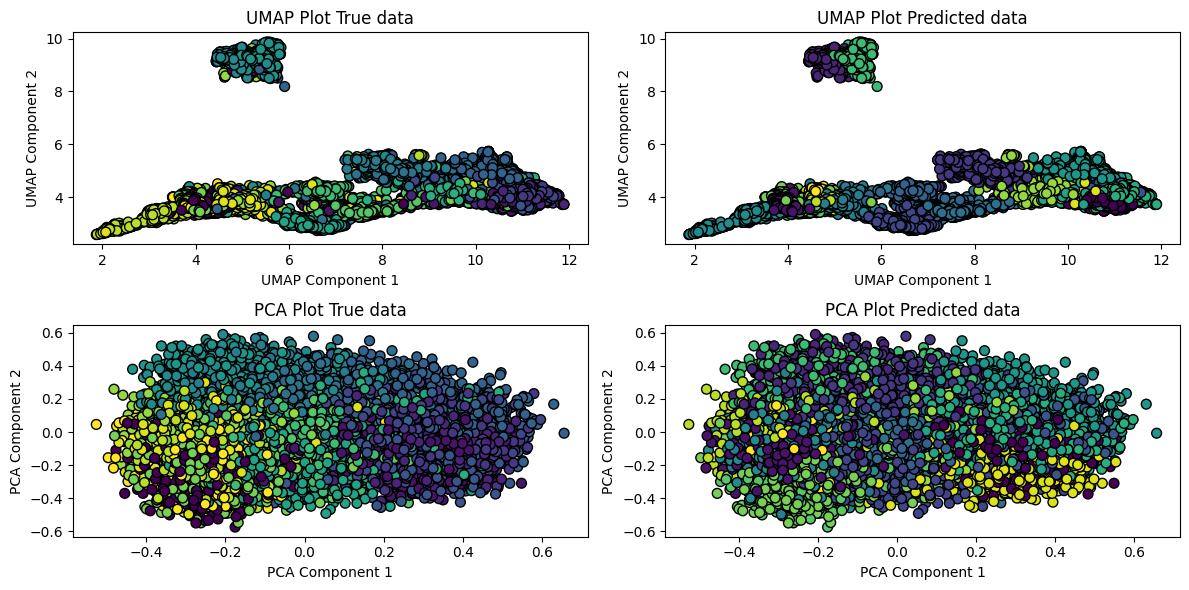

In [ ]:
# UMAP plot - True data
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(ng20_jose_umap[:, 0], ng20_jose_umap[:, 1], c=ng20_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('UMAP Plot True data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# UMAP plot - Predicted data
plt.subplot(2, 2, 2)
plt.scatter(ng20_jose_umap[:, 0], ng20_jose_umap[:, 1], c=ng20_jose_clusters_umap, cmap='viridis', edgecolors='k', s=50)
plt.title('UMAP Plot Predicted data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# PCA plot - True data
plt.subplot(2, 2, 3)
plt.scatter(ng20_jose_pca[:, 0], ng20_jose_pca[:, 1], c=ng20_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Plot True data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# PCA plot - Predicted data
plt.subplot(2, 2, 4)
plt.scatter(ng20_jose_pca[:, 0], ng20_jose_pca[:, 1], c=ng20_jose_clusters_umap, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Plot Predicted data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

Nosu remarquons une séparabilité similaire aux true labels et nous cofirmons la performances du modèles k-means-UMAP et PCA.